In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

Load data.

In [2]:
seq_expression = pd.read_csv("../data/linear_models_20230815/rep1_expression_DNA_20_RNA_20_20230815.csv", index_col=0)
motif_scores = pd.read_csv("../data/linear_models_20230815/rep1_GOMER_scores_20230815.txt", sep='\t', index_col=0)
motif_scores.index.name = None

In [3]:
seq_expression.head()

,sequence,log10_RNA_rep1_norm
0,AATGTTTTAGGCCAGTGCCATGGGGTATGAAGTGAGGGGAATTGGG...,1.013224
1,GCCTACACGTCGTCGTTTGGTCATCACGACTGTAGCCGGACTGGAA...,0.438184
2,GAGGTGTGCTGTTGACCTGGCGACTGTGACTATGGGGTCTTCACGA...,0.338543
3,CCTGGAGCGATTGTTTCCACATTCCAGGTCGATGGTGGCTCTTCTT...,0.209343
4,TTCTCGTTATATGCCTGCTACGTCGCTGCGTTTTTGGCCCGGCCGT...,0.585465


In [4]:
motif_scores.head()

,AHR_HUMAN.H11MO.0.B,AIRE_HUMAN.H11MO.0.C,ALX1_HUMAN.H11MO.0.B,ANDR_HUMAN.H11MO.0.A,AP2A_HUMAN.H11MO.0.A,AP2B_HUMAN.H11MO.0.B,AP2C_HUMAN.H11MO.0.A,ARI5B_HUMAN.H11MO.0.C,ARNT_HUMAN.H11MO.0.B,ASCL1_HUMAN.H11MO.0.A,...,ZN768_HUMAN.H11MO.0.C,ZN770_HUMAN.H11MO.0.C,ZN816_HUMAN.H11MO.0.C,ZNF18_HUMAN.H11MO.0.C,ZNF41_HUMAN.H11MO.0.C,ZNF76_HUMAN.H11MO.0.C,ZNF8_HUMAN.H11MO.0.C,ZNF85_HUMAN.H11MO.0.C,ZSC22_HUMAN.H11MO.0.C,ZSC31_HUMAN.H11MO.0.C
0,0.000016,9.233030e-09,2.649490e-07,4.705900e-11,1.961760e-05,0.000012,2.042690e-06,4.803570e-05,0.000300,3.961270e-09,...,0.000000e+00,5.131450e-13,6.340070e-10,2.819200e-04,1.110220e-15,3.763210e-12,0.0,2.351990e-11,4.992990e-10,1.799360e-11
1,0.000013,2.162340e-07,1.321070e-05,1.054470e-10,5.714010e-09,0.000386,6.808270e-09,2.718690e-08,0.002740,5.291150e-08,...,1.398880e-14,0.000000e+00,2.586820e-13,6.766940e-04,2.753350e-14,1.601710e-10,0.0,5.536540e-10,3.280490e-12,1.510970e-09
2,0.000745,1.522720e-08,8.444500e-08,1.846190e-11,1.426740e-04,0.002027,4.399530e-05,8.431660e-04,0.000112,1.019910e-07,...,2.220450e-16,3.042010e-14,1.176840e-14,6.670010e-06,0.000000e+00,5.240250e-14,0.0,3.521630e-13,2.173860e-10,5.065640e-11
3,0.000008,8.839240e-09,3.520900e-07,7.152850e-10,7.810420e-12,0.000002,3.276330e-11,2.380240e-06,0.000067,1.533670e-08,...,3.552710e-15,2.220450e-15,6.505910e-14,2.456360e-08,1.887380e-14,1.320720e-12,0.0,1.986900e-11,4.864160e-10,3.737500e-11
4,0.000021,1.547580e-06,5.456370e-09,9.516250e-11,5.096480e-06,0.001889,1.030260e-05,2.353830e-06,0.000089,5.207720e-10,...,0.000000e+00,8.881780e-16,7.696070e-13,9.683220e-07,7.904790e-14,5.107030e-15,0.0,2.817080e-12,4.234080e-11,2.704020e-10


In [5]:
print(seq_expression.shape)
print(motif_scores.shape)

(70059, 2)
(70059, 401)


Make train/validation/test splits.

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    motif_scores, seq_expression['log10_RNA_rep1_norm'], test_size=0.1, random_state=11)
X_train, X_val, y_train, y_val = model_selection.train_test_split(
    X_train, y_train, test_size=1/9, random_state=11)

In [7]:
for i in [X_train, y_train, X_val, y_val, X_test, y_test]:
    print(i.shape)

(56047, 401)
(56047,)
(7006, 401)
(7006,)
(7006, 401)
(7006,)


In [8]:
def fit_and_eval_model(model, X_train, y_train, X_val, y_val, random_state=11):
    model.fit(X_train, y_train)
    train_MSE = metrics.mean_squared_error(y_train, model.predict(X_train))
    train_score = model.score(X_train, y_train)
    y_pred = model.predict(X_val)
    val_MSE = metrics.mean_squared_error(y_val, y_pred)
    val_score = model.score(X_val, y_val)
    return {'model': model, 'train_MSE': train_MSE, 'train_score': train_score,
            'val_MSE': val_MSE, 'val_score': val_score,}

In [9]:
def plot_train_val(results, params, metric, xlabel, ylabel, log=True):
    train_scores = [i[f"train_{metric}"] for i in results]
    val_scores = [i[f"val_{metric}"] for i in results]
    plt.plot(params, train_scores, 'bo', label="train")
    plt.plot(params, val_scores, 'go', label="val")
    if log:
        plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

Try OLS regression.

In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
train_MSE = metrics.mean_squared_error(y_train, model.predict(X_train))
train_score = model.score(X_train, y_train)
y_pred = model.predict(X_val)
val_MSE = metrics.mean_squared_error(y_val, y_pred)
val_score = model.score(X_val, y_val)
print(train_MSE, train_score, val_MSE, val_score)

0.058914083572971065 0.011042882673659049 0.3500752554046036 -4.979317394414077


Try lasso regression.

In [11]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 10]
res = []
for alpha in alphas:
    lassoreg = linear_model.Lasso(alpha=alpha)
    res.append(fit_and_eval_model(lassoreg, X_train, y_train, X_val, y_val))
    

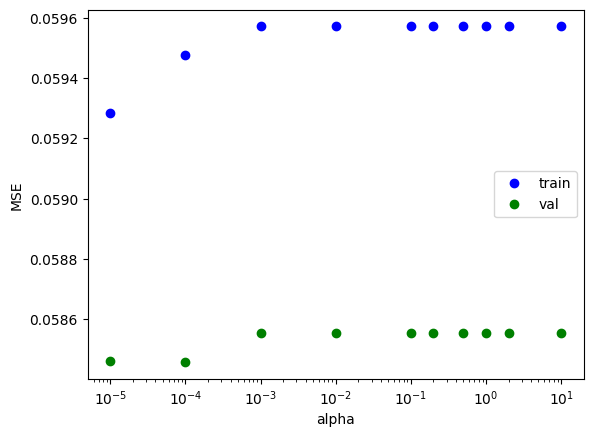

In [12]:
plot_train_val(res, alphas, 'MSE', 'alpha', 'MSE')

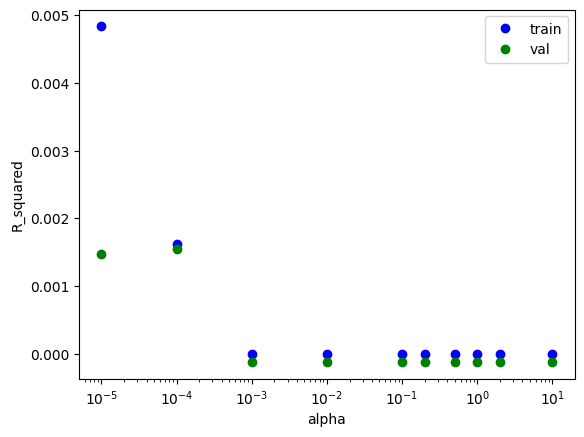

In [13]:
plot_train_val(res, alphas, 'score', 'alpha', 'R_squared')

Try ridge regression.

In [14]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 10]
res = []
for alpha in alphas:
    ridgereg = linear_model.Ridge(alpha=alpha)
    res.append(fit_and_eval_model(ridgereg, X_train, y_train, X_val, y_val))

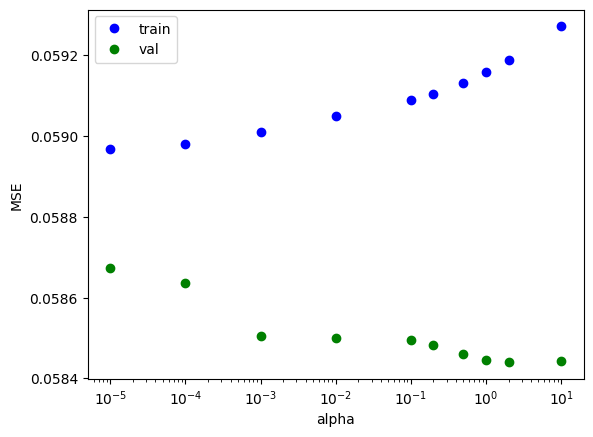

In [15]:
plot_train_val(res, alphas, 'MSE', 'alpha', 'MSE')

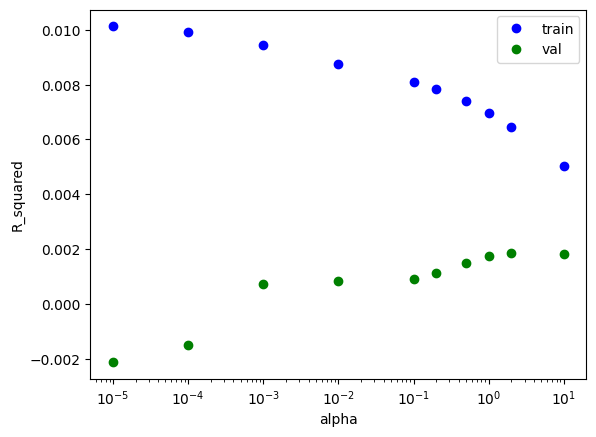

In [16]:
plot_train_val(res, alphas, 'score', 'alpha', 'R_squared')

Get coefficients from best model.

In [17]:
best = res[8]['model']
coef = best.coef_
coef_sorted = np.argsort(coef)[::-1]

In [18]:
list(zip(motif_scores.columns[coef_sorted], coef[coef_sorted]))[:10]

[('ZFP42_HUMAN.H11MO.0.A', 0.21258325582477222),
 ('SMCA1_HUMAN.H11MO.0.C', 0.20146246037802198),
 ('CEBPE_HUMAN.H11MO.0.A', 0.1835509947435523),
 ('JUNB_HUMAN.H11MO.0.A', 0.18013319712457646),
 ('GATA3_HUMAN.H11MO.0.A', 0.1694651692189744),
 ('STAT6_HUMAN.H11MO.0.B', 0.16039523883224338),
 ('CEBPG_HUMAN.H11MO.0.B', 0.14990107551480825),
 ('TFEB_HUMAN.H11MO.0.C', 0.14013399726802558),
 ('STA5B_HUMAN.H11MO.0.A', 0.13194001327877383),
 ('ETS2_HUMAN.H11MO.0.B', 0.13127393721961234)]

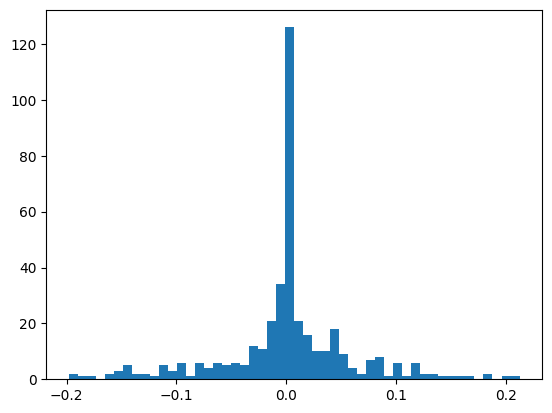

In [19]:
plt.hist(coef, bins=50)
plt.show()

In [20]:
motif_scores['ZFP42_HUMAN.H11MO.0.A'].sort_values(ascending=False)

10705    5.000000e-01
6131     5.000000e-01
68750    5.000000e-01
44389    3.554520e-01
2685     2.216730e-01
             ...     
64684    6.496270e-11
56618    6.399570e-11
59380    5.754640e-11
18166    5.206150e-11
57592    4.691310e-11
Name: ZFP42_HUMAN.H11MO.0.A, Length: 70059, dtype: float64

In [21]:
seq_expression.iloc[10705]['sequence'].find('GCCAT')

57

In [22]:
seq_expression.iloc[10705]['sequence']

'ATTGGTAAAGAGGATGCACCCAGGTGTATGCTGGCGGTAACGCGGAGGGGAGAGGCAGCCATTTTGGCTTGATTTCCATACATATCATCGAAGGAATACG'

In [23]:
seq_expression.iloc[6131]['sequence']

'CCGTATTTCTCCCGGTTAATGACTCGTGTTCCCTAAAATGGCTGCCGCCTTGGGTCGACAGGAGCGGTTTTGTGACCAGCCTAGAATGCTCTCTGGGCTG'